In [53]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [54]:
df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'target'],
      dtype='object')

In [64]:
df_train.shape

(891, 11)

In [55]:
train_X = df_train.drop(['name', 'target', 'ticket','cabin'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['name', 'target', 'ticket','cabin'], axis=1)
test_y = df_test['target']

In [56]:
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [57]:
# kvuli konvergenci
scaler = StandardScaler().fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [58]:
model = LogisticRegression()
# model = model.fit(train_X, train_y)

In [71]:
scores = cross_val_score(model, train_X, train_y, cv=80)

In [72]:
scores.mean()

0.7962121212121213

In [73]:
mo

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [46]:
pd.DataFrame(zip(model.coef_[0]
, features))

,0,1
0,-0.904067,pclass
1,-0.497948,age
2,-0.351782,sibsp
3,-0.072876,parch
4,0.102734,fare
5,0.647219,sex_female
6,-0.647219,sex_male
7,0.078541,embarked_C
8,0.037227,embarked_Q
9,-0.092233,embarked_S


In [19]:
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.7991021324354658
Test score
0.9425837320574163


In [20]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 473, TP: 239, FN: 103, FP: 76
Test
TN: 251, TP: 143, FN: 9, FP: 15


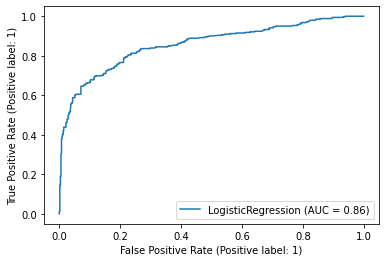

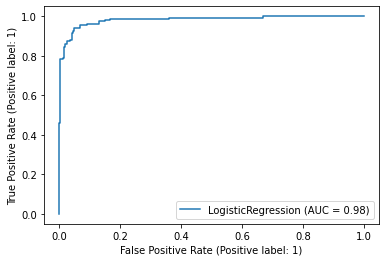

In [21]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)